##extracting the data from directories and create test and train generator


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
test_dir = "/content/drive/MyDrive/tumor_dataset_contrast/test"
train_dir = "/content/drive/MyDrive/tumor_dataset_contrast/train"

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

train_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle=False,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 1503 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


##builing up the models

In [12]:
my_model1 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

my_model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,795 (3.21 MB)

 Trainable params: 841,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
my_model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes
])

my_model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,795 (3.21 MB)

 Trainable params: 841,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

##training the models

In [14]:
# Compile the model
my_model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping1 = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint1 = ModelCheckpoint('my_model1.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history3 = my_model1.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15,
    callbacks=[early_stopping1, model_checkpoint1]
)


Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5897 - loss: 0.8394
Epoch 1: val_loss improved from inf to 0.50651, saving model to my_model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.5907 - loss: 0.8371 - val_accuracy: 0.8033 - val_loss: 0.5065
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.7399 - loss: 0.5403
Epoch 2: val_loss improved from 0.50651 to 0.43327, saving model to my_model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 794ms/step - accuracy: 0.7401 - loss: 0.5402 - val_accuracy: 0.8167 - val_loss: 0.4333
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.8284 - loss: 0.4182
Epoch 3: val_loss improved from 0.43327 to 0.33555, saving model to my_model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 770ms/step - accuracy: 0.8284 - loss: 0.4180 - val_accuracy: 0.8533 - val_loss: 0.3355
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.8840 - loss: 0.2944
Epoch 4: val_loss improved from 0.33555 to 0.26542, saving 

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = my_model1.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 445ms/step


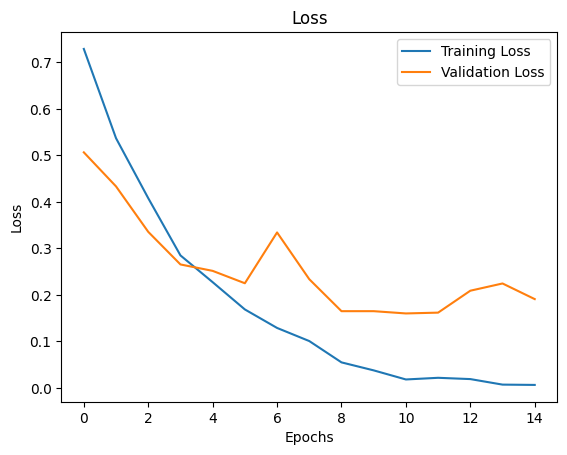

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Compile the model
my_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping2 = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint2 = ModelCheckpoint('my_model2.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history2 = my_model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15,
    callbacks=[early_stopping2, model_checkpoint2]
)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.5400 - loss: 0.8899
Epoch 1: val_loss improved from inf to 0.53229, saving model to my_model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 912ms/step - accuracy: 0.5416 - loss: 0.8874 - val_accuracy: 0.7833 - val_loss: 0.5323
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.7591 - loss: 0.5692
Epoch 2: val_loss improved from 0.53229 to 0.43824, saving model to my_model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 795ms/step - accuracy: 0.7589 - loss: 0.5692 - val_accuracy: 0.8117 - val_loss: 0.4382
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.8066 - loss: 0.4500
Epoch 3: val_loss improved from 0.43824 to 0.43429, saving model to my_model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 832ms/step - accuracy: 0.8065 - loss: 0.4498 - val_accuracy: 0.7700 - val_loss: 0.4343
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.8242 - loss: 0.3917
Epoch 4: val_loss improved from 0.43429 to 0.34502, sa

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 507ms/step


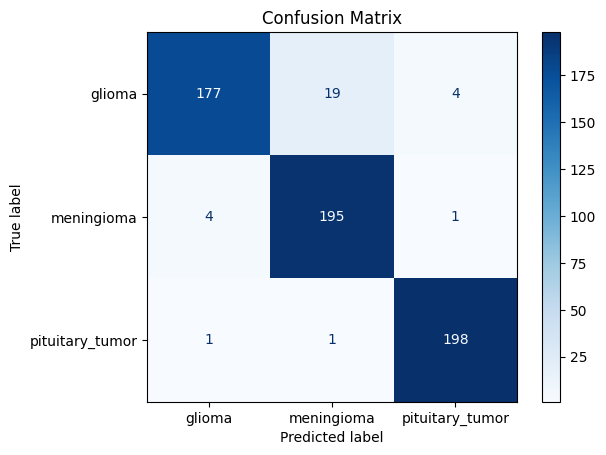

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = my_model2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes , predicted_classes)

#plot---
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = class_labels)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

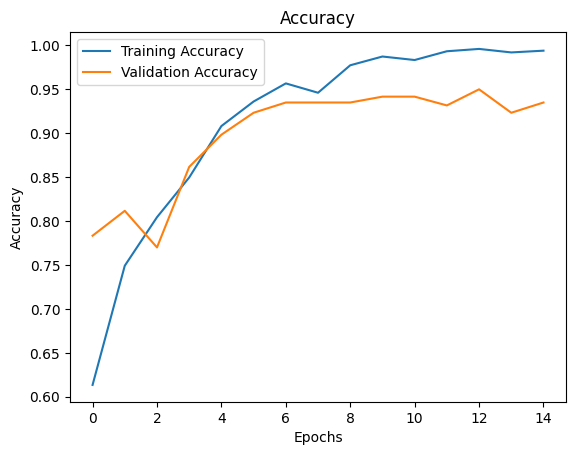

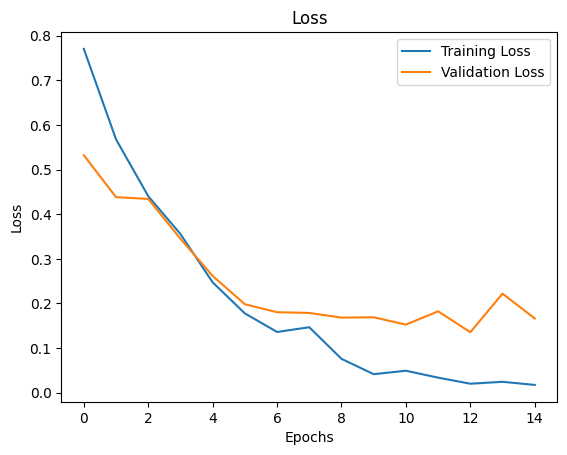

In [23]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()